<a href="https://colab.research.google.com/github/vivaldydermagia123/project1_sales_forecasting/blob/main/Project_1_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding

## Feature Explanation



* store_nbr 		: Nama toko tempat produk terjual
* family 		: Jenis produk yang dijual di toko tersebut.
* sales 			: Jumlah penjualan produk pada satuan tertentu.
* onpromotion 	: Jumlah item produk yang dipromosikan.
* Dcoilwtico 		: Harga minyak mentah di West Texas Intermediate Cushing, Oklahoma
* Time Range		: 1 Jan 2013 - 15 Ags 2017 (Data harian)



## Family feature explanation

Feature family terdiri dar 33 category :
* AUTOMOTIVE                    
* HOME APPLIANCES               
* SCHOOL AND OFFICE SUPPLIES    
* PRODUCE                       
* PREPARED FOODS                
* POULTRY                       
* PLAYERS AND ELECTRONICS       
* PET SUPPLIES                  
* PERSONAL CARE                 
* MEATS                         
* MAGAZINES                     
* LIQUOR,WINE,BEER              
* LINGERIE                      
* LAWN AND GARDEN               
* LADIESWEAR                    
* HOME CARE                     
* HOME AND KITCHEN II           
* BABY CARE                     
* HOME AND KITCHEN I            
* HARDWARE                      
* GROCERY II                    
* GROCERY I                     
* FROZEN FOODS                  
* EGGS                          
* DELI                          
* DAIRY                         
* CLEANING                      
* CELEBRATION                   
* BREAD/BAKERY                  
* BOOKS                        
* BEVERAGES                     
* BEAUTY                        
* SEAFOOD                                           


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow import keras
from tensorflow.keras import metrics
import sklearn as sk
import keras

## EDA

Informasi tentang dataset yang digunakan

>[Information of dataset](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CefiroMartha/Store5/refs/heads/main/store5.csv')
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.0,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.0,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.0,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.0,0,NaN
4,1456,2013-01-01,5,BOOKS,0.0,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [ ]:
# melihat statistik deskriptive sederhana
col_num = [x for x in df.columns if df[x].dtype != 'object' and x not in ['id', 'date', 'store_nbr','family']]
df[col_num].describe()

,sales,onpromotion,dcoilwtico
count,55572.000000,55572.000000,38379.000000
mean,280.580231,2.687864,67.925589
std,652.588149,11.748996,25.666659
min,0.000000,0.000000,26.190000
25%,1.000000,0.000000,46.380000
50%,19.000000,0.000000,53.330000
75%,237.000000,0.000000,95.800000
max,8216.620000,182.000000,110.620000


In [ ]:
# melihat nilai unik dari setiap feature
def number_unique(df):
  for i in df.columns:
    print(f'kolom {i} memiliki {df[i].nunique()} nilai unik')

number_unique(df)

kolom id memiliki 55572 nilai unik
kolom date memiliki 1684 nilai unik
kolom store_nbr memiliki 1 nilai unik
kolom family memiliki 33 nilai unik
kolom sales memiliki 14753 nilai unik
kolom onpromotion memiliki 165 nilai unik
kolom dcoilwtico memiliki 994 nilai unik


In [ ]:
# Melihat jumlah dari setiap kategori di dalam feature
def number_counts(df):
  for i in df.columns:
    if i in ['id', 'date', 'store_nbr']:
      continue
    else:
      print(f'===========\n')
      print(f'kolom {i} \n{df[i].value_counts()}')

number_counts(df)


kolom family 
family
AUTOMOTIVE                    1684
HOME APPLIANCES               1684
SCHOOL AND OFFICE SUPPLIES    1684
PRODUCE                       1684
PREPARED FOODS                1684
POULTRY                       1684
PLAYERS AND ELECTRONICS       1684
PET SUPPLIES                  1684
PERSONAL CARE                 1684
MEATS                         1684
MAGAZINES                     1684
LIQUOR,WINE,BEER              1684
LINGERIE                      1684
LAWN AND GARDEN               1684
LADIESWEAR                    1684
HOME CARE                     1684
HOME AND KITCHEN II           1684
BABY CARE                     1684
HOME AND KITCHEN I            1684
HARDWARE                      1684
GROCERY II                    1684
GROCERY I                     1684
FROZEN FOODS                  1684
EGGS                          1684
DELI                          1684
DAIRY                         1684
CLEANING                      1684
CELEBRATION                   168

In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
dcoilwtico,17193


**Note** : niai o pada feature **sales & on promotion** bukan mengintepretasikan missing value

In [ ]:
df = df.drop(columns=['id','dcoilwtico'])

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['raw_date'] = df['date']

df = df.set_index('date')

df['date'] = df['raw_date']

df = df.drop(columns=['raw_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55572 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   store_nbr    55572 non-null  int64         
 1   family       55572 non-null  object        
 2   sales        55572 non-null  float64       
 3   onpromotion  55572 non-null  int64         
 4   date         55572 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.5+ MB


## Category Selection

In [ ]:
df['family'].value_counts()

,count
family,
AUTOMOTIVE,1684
HOME APPLIANCES,1684
SCHOOL AND OFFICE SUPPLIES,1684
PRODUCE,1684
PREPARED FOODS,1684
POULTRY,1684
PLAYERS AND ELECTRONICS,1684
PET SUPPLIES,1684
PERSONAL CARE,1684


In [ ]:
data = df[df['family'].isin(['AUTOMOTIVE', 'BEAUTY', 'CLEANING', 'SEAFOOD'])]

In [ ]:
df_automotive = data[data['family'] == 'AUTOMOTIVE']

In [ ]:
number_unique(df_automotive)

kolom store_nbr memiliki 1 nilai unik
kolom family memiliki 1 nilai unik
kolom sales memiliki 20 nilai unik
kolom onpromotion memiliki 3 nilai unik
kolom date memiliki 1684 nilai unik
kolom week memiliki 53 nilai unik


In [ ]:
number_counts(df_automotive)


kolom family 
family
AUTOMOTIVE    1684
Name: count, dtype: int64

kolom sales 
sales
5.0     246
4.0     226
3.0     196
6.0     185
2.0     159
7.0     144
8.0     106
1.0      96
9.0      94
10.0     60
0.0      44
11.0     41
12.0     29
13.0     21
14.0     12
15.0     10
16.0      7
18.0      4
19.0      2
17.0      2
Name: count, dtype: int64

kolom onpromotion 
onpromotion
0    1666
1      17
2       1
Name: count, dtype: int64

kolom week 
week
27    35
17    35
30    35
29    35
28    35
2     35
26    35
25    35
24    35
23    35
22    35
21    35
20    35
19    35
18    35
16    35
32    35
15    35
14    35
13    35
12    35
11    35
10    35
9     35
8     35
7     35
6     35
5     35
4     35
3     35
31    35
1     34
33    30
34    28
50    28
49    28
48    28
47    28
46    28
45    28
44    28
43    28
42    28
41    28
40    28
39    28
38    28
37    28
36    28
35    28
51    27
52    25
53     7
Name: count, dtype: Int64


In [ ]:
df_automotive.isnull().sum()

,0
store_nbr,0
family,0
sales,0
onpromotion,0
date,0
week,0


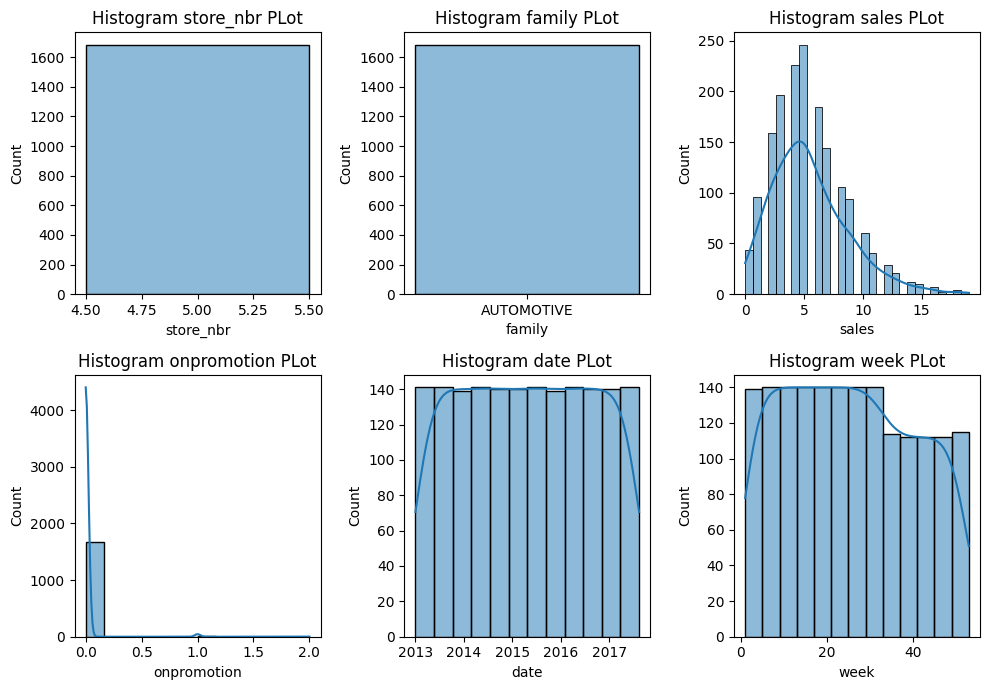

In [ ]:
def histo_plot(df):
  plt.figure(figsize=(10,7))
  for indx, i in enumerate(df.columns):
    plt.subplot(2,3, indx+1)
    sns.histplot(df[i], kde=True)
    plt.title(f'Histogram {i} PLot')
    plt.tight_layout()

  plt.show()

histo_plot(df_automotive)

In [ ]:
df_automotive.isnull().sum()

,0
store_nbr,0
family,0
sales,0
onpromotion,0
date,0
week,0


In [ ]:
df_automotive['onpromotion'].value_counts()

,count
onpromotion,
0,1666
1,17
2,1


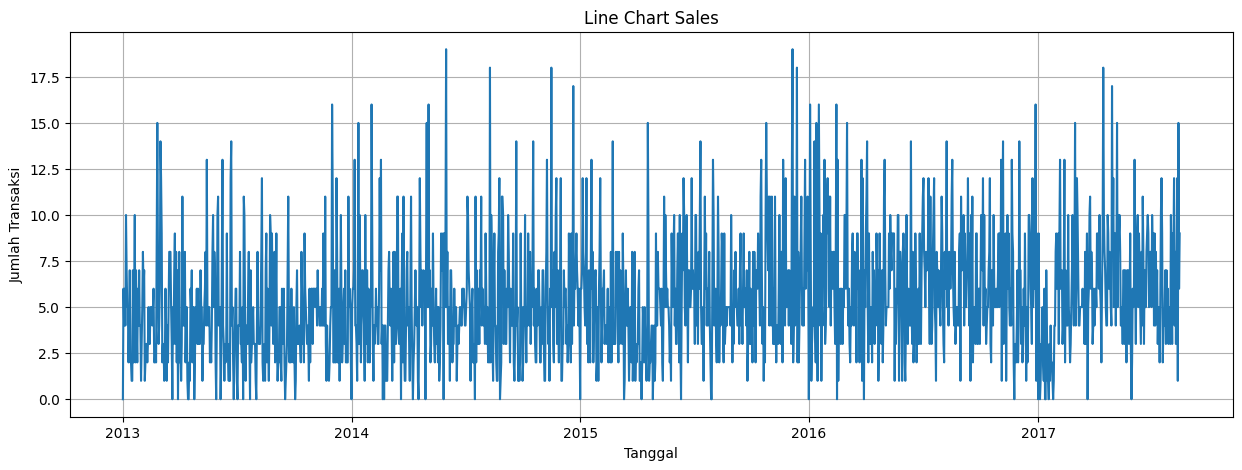

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_automotive['sales'])
plt.title('Line Chart Sales')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

In [ ]:
# split data berdasarkan tahun
df_2017 = df_automotive.loc['2017']
df_2016 = df_automotive.loc['2016']
df_2015 = df_automotive.loc['2015']
df_2014 = df_automotive.loc['2014']
df_2013 = df_automotive.loc['2013']

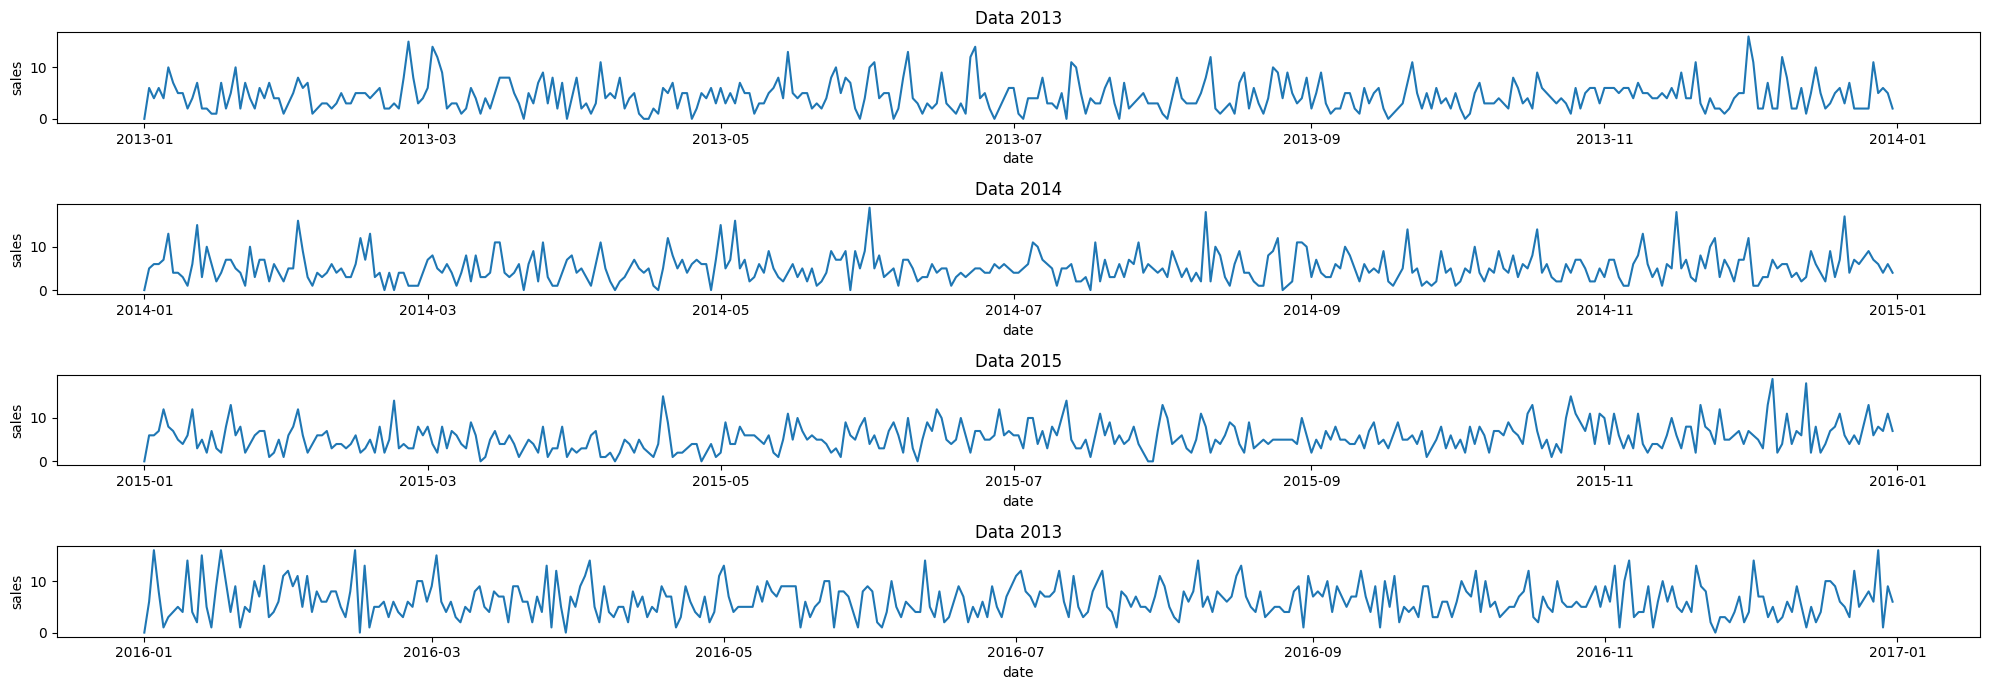

In [ ]:
fig, ax = plt.subplots(4, 1 , figsize=(20,7))

sns.lineplot(x=df_2013.index, y=df_2013['sales'], ax=ax[0])
ax[0].set_title('Data 2013')

sns.lineplot(x=df_2014.index, y=df_2014['sales'], ax=ax[1])
ax[1].set_title('Data 2014')

sns.lineplot(x=df_2015.index, y=df_2015['sales'], ax=ax[2])
ax[2].set_title('Data 2015')

sns.lineplot(x=df_2016.index, y=df_2016['sales'], ax=ax[3])
ax[3].set_title('Data 2013')

plt.tight_layout()
plt.show()

<ipython-input-56-5124d653f135>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_automotive.index.year, y='sales', data=df_automotive, palette='viridis')


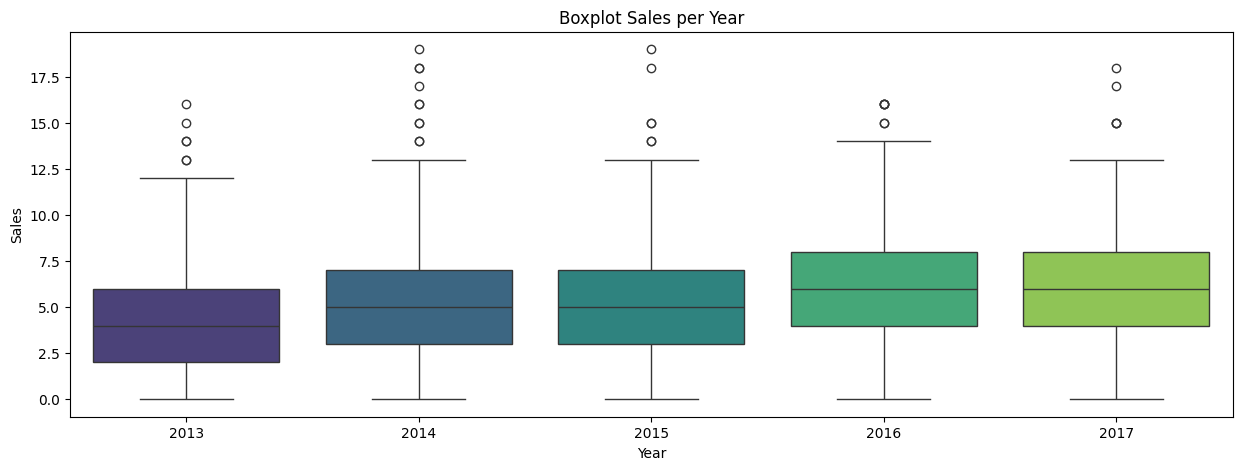

In [ ]:
# Visualisasi data  boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_automotive.index.year, y='sales', data=df_automotive, palette='viridis')
plt.title('Boxplot Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Fungsi untuk melakukan ADF test dan mencetak hasilnya
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Lakukan ADF test untuk setiap variabel
adf_test(df_automotive['sales'], title='Sales')
adf_test(df_automotive['onpromotion'], title='On Promotion')

Augmented Dickey-Fuller Test: Sales
ADF Test Statistic            -5.662511e+00
p-value                        9.309993e-07
#Lags Used                     2.000000e+01
Number of Observations Used    1.663000e+03
Critical Value (1%)           -3.434288e+00
Critical Value (5%)           -2.863280e+00
Critical Value (10%)          -2.567696e+00

Augmented Dickey-Fuller Test: On Promotion
ADF Test Statistic            -7.680566e+00
p-value                        1.507855e-11
#Lags Used                     1.300000e+01
Number of Observations Used    1.670000e+03
Critical Value (1%)           -3.434272e+00
Critical Value (5%)           -2.863272e+00
Critical Value (10%)          -2.567692e+00



In [ ]:
df_automotive_new1 = df_automotive[['family','sales','onpromotion','store_nbr']]
df_automotive_new1.head()

,family,sales,onpromotion,store_nbr
date,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5
2013-01-02,AUTOMOTIVE,6.0,0,5
2013-01-03,AUTOMOTIVE,4.0,0,5
2013-01-04,AUTOMOTIVE,6.0,0,5
2013-01-05,AUTOMOTIVE,4.0,0,5


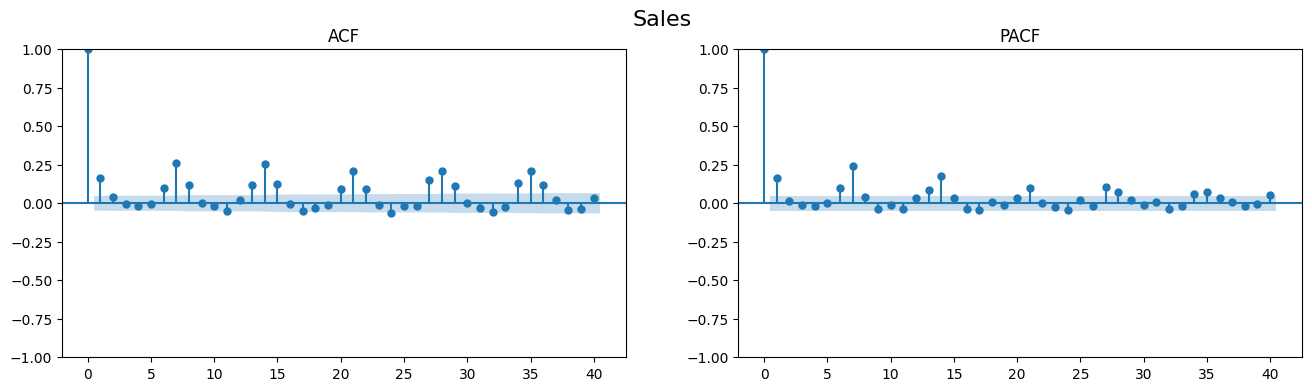

In [ ]:
import statsmodels.api as sm

# Fungsi untuk plot ACF dan PACF
def plot_acf_pacf(series, lags=40, title=''):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    fig.suptitle(title, fontsize=16)

    # Plot ACF
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title('ACF')

    # Plot PACF
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title('PACF')

    plt.show()

# Plot ACF dan PACF untuk masing-masing variabel
plot_acf_pacf(df_automotive_new1['sales'], title='Sales')

In [ ]:
df['week'] = df.index.isocalendar().week

In [ ]:
df_automotive_new1.loc[:, 'dayofweek'] = df_automotive_new1.index.dayofweek
df_automotive_new1.head()

<ipython-input-61-d585bdf2bacf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_automotive_new1.loc[:, 'dayofweek'] = df_automotive_new1.index.dayofweek


,family,sales,onpromotion,store_nbr,dayofweek
date,,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5,1
2013-01-02,AUTOMOTIVE,6.0,0,5,2
2013-01-03,AUTOMOTIVE,4.0,0,5,3
2013-01-04,AUTOMOTIVE,6.0,0,5,4
2013-01-05,AUTOMOTIVE,4.0,0,5,5


In [ ]:
df_automotive_new1.describe()

,sales,onpromotion,store_nbr,dayofweek
count,1684.000000,1684.000000,1684.0,1684.000000
mean,5.459620,0.011283,5.0,2.997031
std,3.257265,0.111132,0.0,2.001334
min,0.000000,0.000000,5.0,0.000000
25%,3.000000,0.000000,5.0,1.000000
50%,5.000000,0.000000,5.0,3.000000
75%,7.000000,0.000000,5.0,5.000000
max,19.000000,2.000000,5.0,6.000000


In [ ]:
# evaluate stasioner
result = adfuller(df_automotive_new1['sales'])
print(f'ADF satistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF satistic: -5.662511223444474
p-value: 9.309992645426182e-07


In [ ]:
df['week'] = df.index.isocalendar().week

**Note** : Data tidak stasioner

In [ ]:
test_result = adfuller(df_automotive_new1['sales'])
test_result = adfuller(df_automotive_new1['onpromotion'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Fungsi untuk melakukan ADF test dan mencetak hasilnya
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Lakukan ADF test untuk setiap variabel
adf_test(df_automotive_new1['sales'], title='Sales')
adf_test(df_automotive_new1['onpromotion'], title='On Promotion')

Augmented Dickey-Fuller Test: Sales
ADF Test Statistic            -5.662511e+00
p-value                        9.309993e-07
#Lags Used                     2.000000e+01
Number of Observations Used    1.663000e+03
Critical Value (1%)           -3.434288e+00
Critical Value (5%)           -2.863280e+00
Critical Value (10%)          -2.567696e+00

Augmented Dickey-Fuller Test: On Promotion
ADF Test Statistic            -7.680566e+00
p-value                        1.507855e-11
#Lags Used                     1.300000e+01
Number of Observations Used    1.670000e+03
Critical Value (1%)           -3.434272e+00
Critical Value (5%)           -2.863272e+00
Critical Value (10%)          -2.567692e+00



In [ ]:
df_automotive_new1.head()

,family,sales,onpromotion,store_nbr,dayofweek
date,,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5,1
2013-01-02,AUTOMOTIVE,6.0,0,5,2
2013-01-03,AUTOMOTIVE,4.0,0,5,3
2013-01-04,AUTOMOTIVE,6.0,0,5,4
2013-01-05,AUTOMOTIVE,4.0,0,5,5


In [ ]:
df_automotive_new1.loc[:, 'dayofweek'] = df_automotive_new1.index.dayofweek
df_automotive_new1.head()

,family,sales,onpromotion,store_nbr,dayofweek
date,,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5,1
2013-01-02,AUTOMOTIVE,6.0,0,5,2
2013-01-03,AUTOMOTIVE,4.0,0,5,3
2013-01-04,AUTOMOTIVE,6.0,0,5,4
2013-01-05,AUTOMOTIVE,4.0,0,5,5


In [ ]:
df_automotive_new1.describe()

,sales,onpromotion,store_nbr,dayofweek
count,1684.000000,1684.000000,1684.0,1684.000000
mean,5.459620,0.011283,5.0,2.997031
std,3.257265,0.111132,0.0,2.001334
min,0.000000,0.000000,5.0,0.000000
25%,3.000000,0.000000,5.0,1.000000
50%,5.000000,0.000000,5.0,3.000000
75%,7.000000,0.000000,5.0,5.000000
max,19.000000,2.000000,5.0,6.000000


In [ ]:
# Menambahkan kolom baru untuk setiap hari dalam minggu
for i in range(7):
    df_automotive_new1[f'day_{i}'] = df_automotive_new1['dayofweek'].apply(lambda x: 1 if x == i else 0)

In [ ]:
df_automotive_new1.head()

,family,sales,onpromotion,store_nbr,dayofweek,day_0,day_1,day_2,day_3,day_4,day_5,day_6
date,,,,,,,,,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5,1,0,1,0,0,0,0,0
2013-01-02,AUTOMOTIVE,6.0,0,5,2,0,0,1,0,0,0,0
2013-01-03,AUTOMOTIVE,4.0,0,5,3,0,0,0,1,0,0,0
2013-01-04,AUTOMOTIVE,6.0,0,5,4,0,0,0,0,1,0,0
2013-01-05,AUTOMOTIVE,4.0,0,5,5,0,0,0,0,0,1,0


In [ ]:
df_automotive_new1['weekly'] = df_automotive_new1['dayofweek'].apply(lambda x: 1 if x == 6 else 0)

In [ ]:
df_automotive_new1.head()

,family,sales,onpromotion,store_nbr,dayofweek,day_0,day_1,day_2,day_3,day_4,day_5,day_6,weekly
date,,,,,,,,,,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5,1,0,1,0,0,0,0,0,0
2013-01-02,AUTOMOTIVE,6.0,0,5,2,0,0,1,0,0,0,0,0
2013-01-03,AUTOMOTIVE,4.0,0,5,3,0,0,0,1,0,0,0,0
2013-01-04,AUTOMOTIVE,6.0,0,5,4,0,0,0,0,1,0,0,0
2013-01-05,AUTOMOTIVE,4.0,0,5,5,0,0,0,0,0,1,0,0


In [ ]:
df_automotive_new1.columns

Index(['family', 'sales', 'onpromotion', 'store_nbr', 'dayofweek', 'day_0',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'weekly'],
      dtype='object')

In [ ]:
df_automotive_new1 = df_automotive_new1[['family', 'sales', 'onpromotion', 'store_nbr', 'weekly']]

In [ ]:
df_automotive_new1.head()

,family,sales,onpromotion,store_nbr,weekly
date,,,,,
2013-01-01,AUTOMOTIVE,0.0,0,5,0
2013-01-02,AUTOMOTIVE,6.0,0,5,0
2013-01-03,AUTOMOTIVE,4.0,0,5,0
2013-01-04,AUTOMOTIVE,6.0,0,5,0
2013-01-05,AUTOMOTIVE,4.0,0,5,0


# Modeling

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_automotive_new1.drop('sales', axis=1)
y = df_automotive_new1['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # Using shuffle=False to maintain time series order

## ARIMA

In [ ]:

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df_automotive_new1.drop('sales', axis=1)
y = df_automotive_new1['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=42, shuffle=False)

model = ARIMA(y_train, order=(2,1,0))
model_fit = model.fit()

y_pred_train = model_fit.predict(start=0, end=len(y_train)-1)
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test)-1)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

evaluation_df_ARIMA = pd.DataFrame({
    'Family': ['AUTOMOTIVE'],
    'RMSE Train': [rmse_train],
    'RMSE Test': [rmse_test],
    'MAE Train': [mae_train],
    'MAE Test': [mae_test]
})

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

## LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_automotive_new1[['sales', 'onpromotion', 'store_nbr', 'weekly']])

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=75, batch_size=20, verbose=1)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((len(y_train), 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 3))), axis=1))[:,0]

y_pred_train = scaler.inverse_transform(np.concatenate((y_pred_train.reshape(-1, 1), np.zeros((len(y_pred_train), 3))), axis=1))[:,0]
y_pred_test = scaler.inverse_transform(np.concatenate((y_pred_test.reshape(-1, 1), np.zeros((len(y_pred_test), 3))), axis=1))[:,0]

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

evaluation_df_LSTM = pd.DataFrame({
    'Family': ['AUTOMOTIVE'],
    'RMSE Train': [rmse_train],
    'RMSE Test': [rmse_test],
    'MAE Train': [mae_train],
    'MAE Test': [mae_test]
})

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0582
Epoch 2/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0281
Epoch 3/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0293
Epoch 4/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278
Epoch 5/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244
Epoch 6/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0250
Epoch 7/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253
Epoch 8/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232
Epoch 9/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0224
Epoch 10/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252
Epoch 11/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0210
Epoch 12/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234
Epoch 13/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243
Epoch 14/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0231
Epoch 15/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226
Epoch 16/75
67/67 ━━━━━━━━━━━━

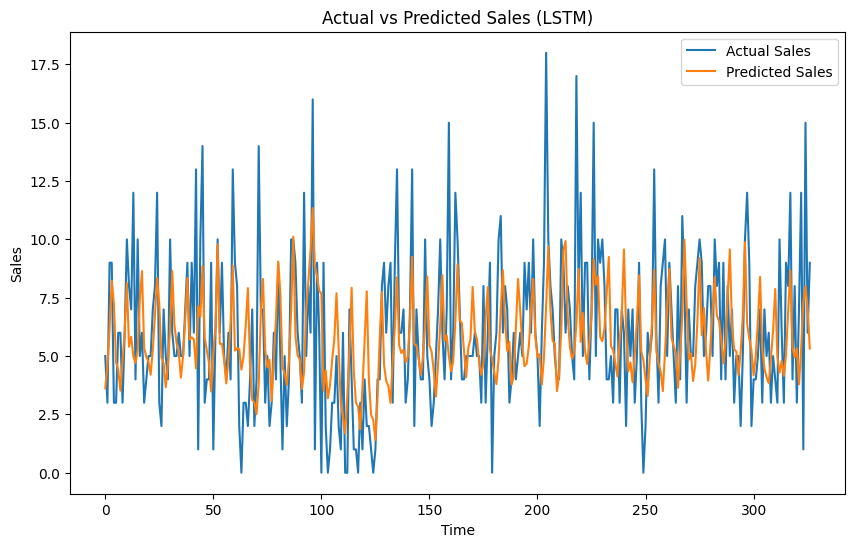

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred_test, label='Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (LSTM)')
plt.legend()
plt.show()

## Model Comparison

In [ ]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: darkblue' if v else '' for v in is_min]

evaluation_df = pd.concat([evaluation_df_ARIMA, evaluation_df_LSTM], keys=['ARIMA', 'LSTM'])
evaluation_df = evaluation_df.reset_index()
evaluation_df = evaluation_df.rename(columns={'level_0': 'Model'})
evaluation_df = evaluation_df.drop(columns='level_1')

styled_df = evaluation_df.style.apply(highlight_min, axis=0, subset=['RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test'])

display(styled_df)

,Model,Family,RMSE Train,RMSE Test,MAE Train,MAE Test
0,ARIMA,AUTOMOTIVE,3.659954,2.046828,2.855571,2.046828
1,LSTM,AUTOMOTIVE,2.789891,3.047711,2.140801,2.379863
